### TYK2 Complete Barcode Map

#### Filtering and Chunk Balance

After a year of construction, we have assembled a complete, full-length TYK2 barcode map for DMS! To generate these data, there were eight sequencing runs containing, in aggregate, 28 chunks. Some of these chunks failed completely, others worked well the first time, and some have multiple runs which can be combined. The table below shows all runs and all chunks contained across those runs:

In [2]:
library(knitr)
library(ggbeeswarm)
library(vroom)
library(tidyverse)

samples <- read_tsv("../data/sample-properties.tsv") %>%
    select(sampleID) %>%
    separate(sampleID, c("run", "chunk"), "/") %>%
    mutate(chunk = gsub("._.*", "", chunk),
           chunk = if_else(run %in% c("run7", "run8") & chunk %in% c("9", "11"),
                           paste0(chunk, "syn"), chunk)) %>%
    distinct()

Rows: 116 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): sampleID, p5_adapter, p3_adapter, barcode_pattern, reference
dbl (1): length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
samples %>% kable(type = "markdown")



|run                |chunk |
|:------------------|:-----|
|OCNT-DMSLIB-1-run1 |10    |
|OCNT-DMSLIB-1-run1 |16    |
|OCNT-DMSLIB-1-run2 |3     |
|OCNT-DMSLIB-1-run2 |4     |
|OCNT-DMSLIB-1-run2 |5     |
|OCNT-DMSLIB-1-run2 |6     |
|OCNT-DMSLIB-1-run3 |2     |
|OCNT-DMSLIB-1-run3 |7     |
|OCNT-DMSLIB-1-run3 |9     |
|OCNT-DMSLIB-1-run3 |11    |
|OCNT-DMSLIB-1-run4 |12    |
|OCNT-DMSLIB-1-run4 |1     |
|OCNT-DMSLIB-1-run4 |13    |
|OCNT-DMSLIB-1-run5 |15    |
|OCNT-DMSLIB-1-run5 |14    |
|OCNT-DMSLIB-1-run5 |17    |
|OCNT-DMSLIB-1-run5 |8     |
|OCNT-DMSLIB-1-run6 |1     |
|OCNT-DMSLIB-1-run6 |2     |
|OCNT-DMSLIB-1-run6 |6     |
|OCNT-DMSLIB-1-run6 |16    |
|OCNT-DMSLIB-1-run7 |1     |
|OCNT-DMSLIB-1-run7 |7     |
|OCNT-DMSLIB-1-run7 |9     |
|OCNT-DMSLIB-1-run7 |11    |
|OCNT-DMSLIB-1-run8 |11    |
|OCNT-DMSLIB-1-run8 |12syn |
|OCNT-DMSLIB-1-run8 |12rc  |

From the above runs, we combined data from:

- chunk 1 (run6 and run7)
- chunk 2 (run3 and run6)
- chunk 6 (run2 and run6)
- chunk 7 (run3 and run7)

And then used the final list of datasets below, concatenated and filtered, as the final map. This set combines some duplicated chunk datasets and discards others based on the relative quality of those data via manual evaluation:

In [4]:
samples_final <- read_tsv("../ry-patterns.tsv") %>%
    select(file) %>%
    mutate(file = gsub("pipeline/", "", file)) %>%
    separate(file, c("run", "chunk"), "/")

Rows: 17 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): file, ry

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
samples_final %>% kable(type = "markdown")



|run                |chunk                |
|:------------------|:--------------------|
|combined           |1.bcmap-final.tsv    |
|combined           |2.bcmap-final.tsv    |
|OCNT-DMSLIB-1-run2 |3.bcmap-final.tsv    |
|OCNT-DMSLIB-1-run2 |4.bcmap-final.tsv    |
|OCNT-DMSLIB-1-run2 |5.bcmap-final.tsv    |
|combined           |6.bcmap-final.tsv    |
|combined           |7.bcmap-final.tsv    |
|OCNT-DMSLIB-1-run5 |8.bcmap-final.tsv    |
|OCNT-DMSLIB-1-run7 |9.bcmap-final.tsv    |
|OCNT-DMSLIB-1-run1 |10.bcmap-final.tsv   |
|OCNT-DMSLIB-1-run8 |11.bcmap-final.tsv   |
|OCNT-DMSLIB-1-run8 |12rc.bcmap-final.tsv |
|OCNT-DMSLIB-1-run4 |13.bcmap-final.tsv   |
|OCNT-DMSLIB-1-run5 |14.bcmap-final.tsv   |
|OCNT-DMSLIB-1-run5 |15.bcmap-final.tsv   |
|OCNT-DMSLIB-1-run6 |16.bcmap-final.tsv   |
|OCNT-DMSLIB-1-run5 |17.bcmap-final.tsv   |

If we combine the 17 datasets shown above and enforce that the RY pattern of each barcode matches its chunk, we obtain a map with the following number of unique barcodes in each chunk:

In [6]:
chunk_counts <- read_tsv("../tyk2-global-map-chunk-balance.txt", col_names = c("count", "chunk")) %>%
    mutate(chunk = gsub(".*/", "", chunk)) %>%
    relocate(chunk)

Rows: 17 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chunk
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
chunk_counts %>% 
    bind_rows(tibble("chunk" = "TOTAL", "count" = sum(chunk_counts$count))) %>%
    kable(type = "markdown")



|chunk                |    count|
|:--------------------|--------:|
|1.bcmap-final.tsv    |  1086930|
|2.bcmap-final.tsv    |  5109159|
|3.bcmap-final.tsv    |  3079733|
|4.bcmap-final.tsv    |  3465791|
|5.bcmap-final.tsv    |  2595347|
|6.bcmap-final.tsv    |  3974705|
|7.bcmap-final.tsv    |  8457736|
|8.bcmap-final.tsv    |  2693599|
|9.bcmap-final.tsv    |  2838179|
|10.bcmap-final.tsv   |  5536180|
|11.bcmap-final.tsv   |  3964805|
|12rc.bcmap-final.tsv |  3408443|
|13.bcmap-final.tsv   |   776941|
|14.bcmap-final.tsv   |   939314|
|15.bcmap-final.tsv   |  2844461|
|16.bcmap-final.tsv   |  1084019|
|17.bcmap-final.tsv   |  1671833|
|TOTAL                | 53527175|

#### Variant and Positional Coverage

Next, we want to evaluate the consistency of our variant coverage by barcodes across the entire protein length. The most abundant variant in all libraries is, of course, wild-type. The plot below shows the percentage of each chunk that is taken up by wild-type (at the AA level) sequences:

In [10]:
bcmap <- vroom("../tyk2-global-map-split.tsv",
               col_names = c("lib", "chunk", "wt_aa", "pos", "mut_aa", "wt_codon", "mut_codon")) %>%
    mutate(WT = if_else(wt_aa == "WT" | wt_aa == mut_aa, "WT", "non-WT"))

Rows: 53527175 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): lib, chunk, wt_aa, mut_aa, wt_codon, mut_codon
dbl (1): pos

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
bcmap_wt_count <- bcmap %>% count(chunk, WT)

bcmap_wt_count %>% write_tsv("../tyk2-global-map-chunk-balance-wt.txt")

In [13]:
read_tsv("../tyk2-global-map-chunk-balance-wt.txt",
         show_col_types = FALSE) %>%
    pivot_wider(names_from = WT, values_from = n) %>%
    mutate(Total = WT + `non-WT`,
           `non-WT %` = `non-WT` / Total,
           `WT %` = WT / Total) %>%
    relocate(c(1,2,5,3,6,4)) %>%
    arrange(as.numeric(gsub("rc", "", chunk))) %>%
    kable(type = "markdown")



|chunk |  non-WT|  non-WT %|     WT|      WT %|   Total|
|:-----|-------:|---------:|------:|---------:|-------:|
|1     |  932966| 0.8583497| 153964| 0.1416503| 1086930|
|2     | 4431417| 0.8673476| 677742| 0.1326524| 5109159|
|3     | 2677251| 0.8693127| 402482| 0.1306873| 3079733|
|4     | 3110929| 0.8976101| 354862| 0.1023899| 3465791|
|5     | 2231303| 0.8597321| 364044| 0.1402679| 2595347|
|6     | 3451212| 0.8682939| 523493| 0.1317061| 3974705|
|7     | 7539834| 0.8914719| 917902| 0.1085281| 8457736|
|8     | 2410319| 0.8948322| 283280| 0.1051678| 2693599|
|9     | 2175104| 0.7663731| 663075| 0.2336269| 2838179|
|10    | 4941150| 0.8925198| 595030| 0.1074802| 5536180|
|11    | 3182490| 0.8026851| 782315| 0.1973149| 3964805|
|12rc  | 2426082| 0.7117860| 982361| 0.2882140| 3408443|
|13    |  648751| 0.8350068| 128190| 0.1649932|  776941|
|14    |  847253| 0.9019912|  92061| 0.0980088|  939314|
|15    | 2495965| 0.8774826| 348496| 0.1225174| 2844461|
|16    |  952106| 0.8783112| 

Next, we want to consider the non-WT sequences only and evaluate their spread across positions and amino acids. If we consider the last WT amino acid as "Stop", there are 1188 positions and 20 non-WT amino acids per position, for 23670 total non-WT constructs. The number of barcodes mapped to each of these 23670 variants is shown below (across all facets, there are 23670 points):

In [16]:
bcmap_nonwt_counts <- bcmap %>%
    filter(WT == "non-WT") %>%
    count(chunk, wt_aa, pos, mut_aa)

bcmap_nonwt_counts %>% write_tsv("../tyk2-global-map-chunk-balance-nonwt.txt")

In [4]:
counts <- read_tsv("../tyk2-global-map-chunk-balance-nonwt.txt") %>%
    mutate(mut_aa = if_else(mut_aa == "X", "*", mut_aa))

mut_aa <- counts %>%
    select(wt_aa) %>%
    distinct() %>%
    unlist()
names(mut_aa) <- mut_aa

all_muts <- counts %>%
    select(chunk, wt_aa, pos) %>%
    distinct() %>%
    arrange(pos) %>%
    expand_grid(mut_aa) %>%
    filter(wt_aa != mut_aa)

counts_join <- left_join(all_muts, counts)
counts_join$n[which(is.na(counts_join$n))] <- 0.1

Rows: 23759 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chunk, wt_aa, mut_aa
dbl (2): pos, n

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining, by = c("chunk", "wt_aa", "pos", "mut_aa")


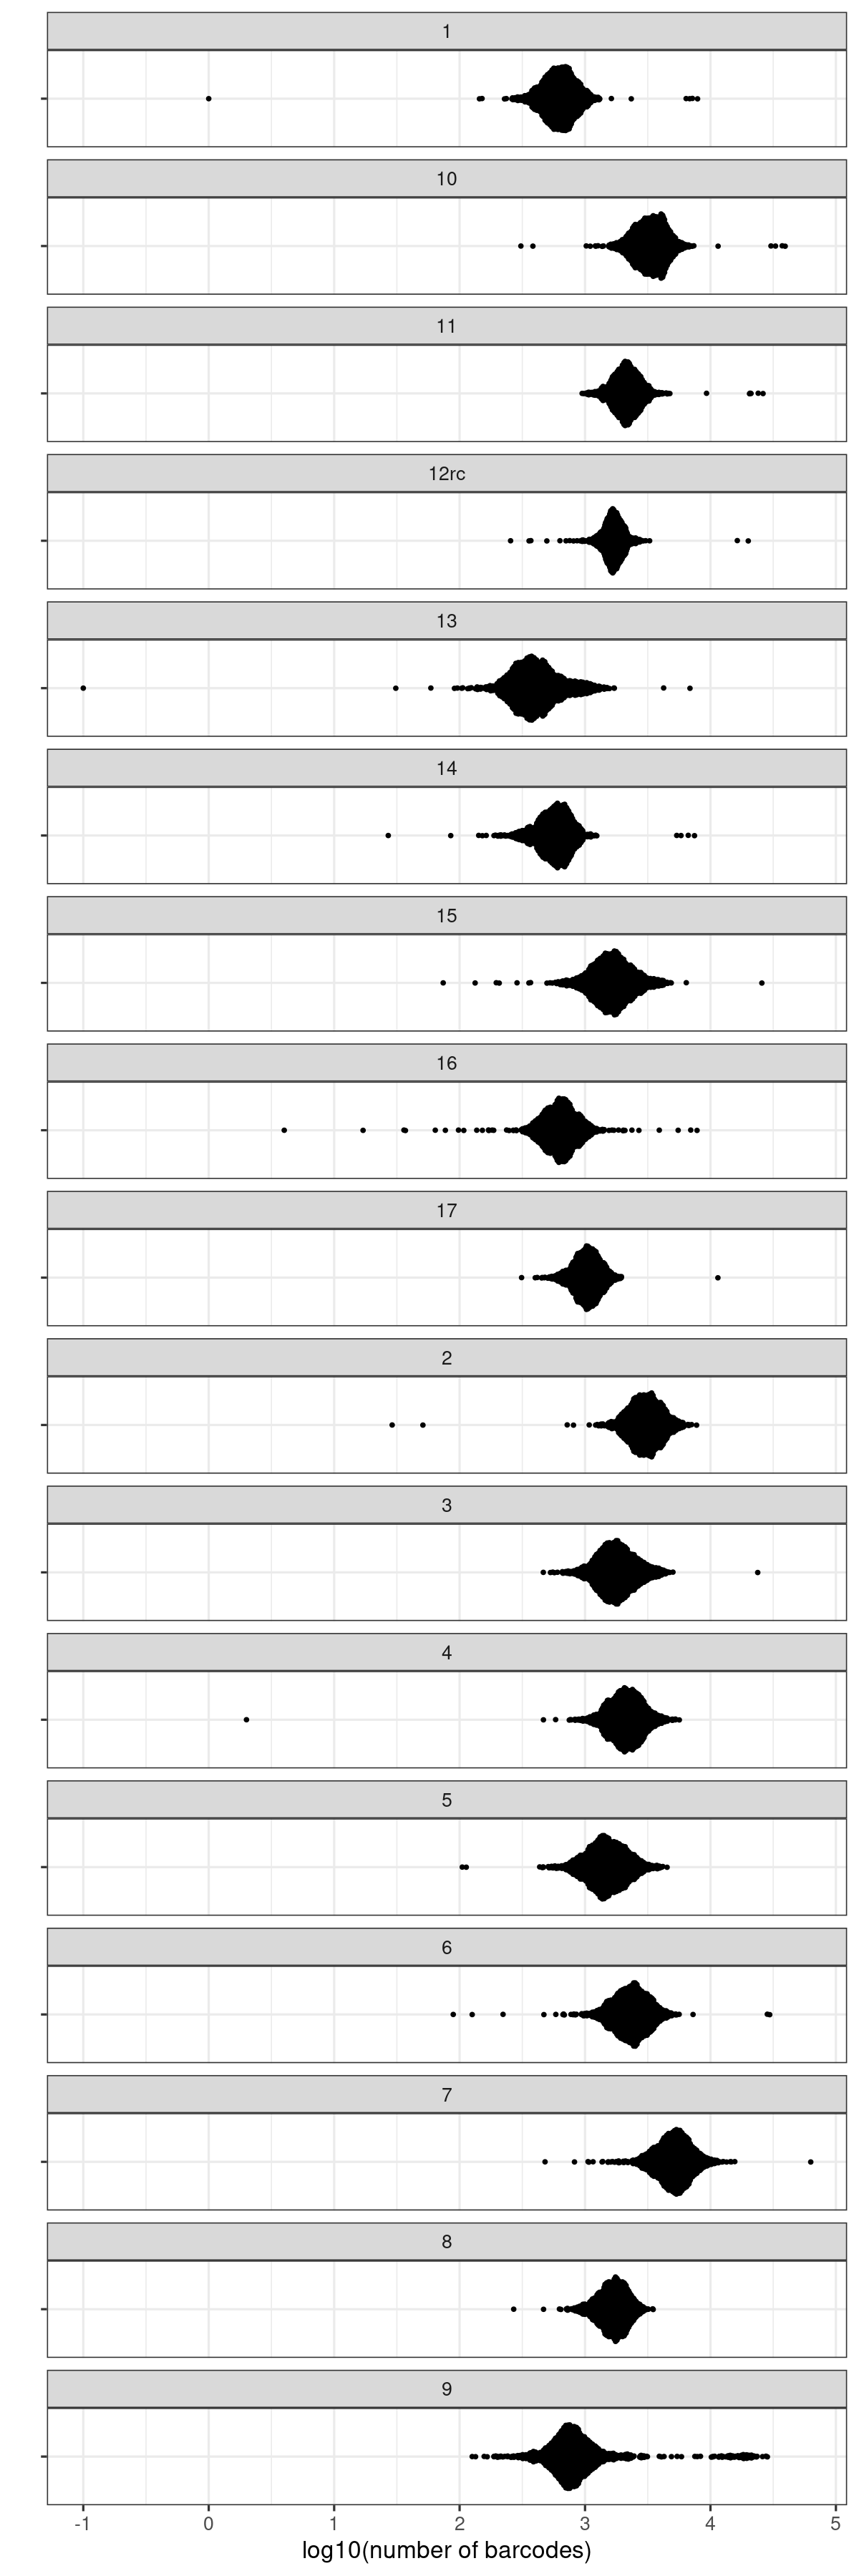

In [5]:
options(repr.plot.width = 10, repr.plot.height = 30)
counts_join %>%
    ggplot +
        geom_quasirandom(aes(x = chunk, y = log10(n))) +
        coord_flip() +
        theme_bw(base_size = 20) +
        facet_wrap(~chunk, ncol = 1, scales = "free_y") +
        xlab("") + ylab("log10(number of barcodes)") +
        theme(axis.text.y = element_blank())

There are exactly 20 variants (0.08%) with <100 barcodes across all chunks, and they are shown below:

In [6]:
counts_join %>%
    filter(n < 100) %>%
    mutate(n = if_else(n < 1, 0, n)) %>%
    arrange(-n) %>%
    rename("number of unique barcodes" = "n") %>%
    kable(type = "markdown")



|chunk |wt_aa |  pos|mut_aa | number of unique barcodes|
|:-----|:-----|----:|:------|-------------------------:|
|16    |L     | 1109|E      |                        98|
|13    |P     |  889|F      |                        96|
|13    |L     |  863|N      |                        91|
|6     |A     |  413|K      |                        89|
|14    |S     |  912|G      |                        85|
|16    |Y     | 1055|R      |                        77|
|15    |L     | 1044|E      |                        74|
|16    |S     | 1063|P      |                        64|
|13    |L     |  903|D      |                        59|
|2     |A     |   75|M      |                        51|
|16    |S     | 1063|Q      |                        37|
|16    |G     | 1061|W      |                        36|
|13    |L     |  903|E      |                        31|
|2     |A     |   75|W      |                        29|
|14    |M     |  926|F      |                        27|
|16    |S     | 1063|R      |

While it is difficult to see each position individually, we can also show coverage along the length of TYK2 ordered by residue position on a log10 scale:

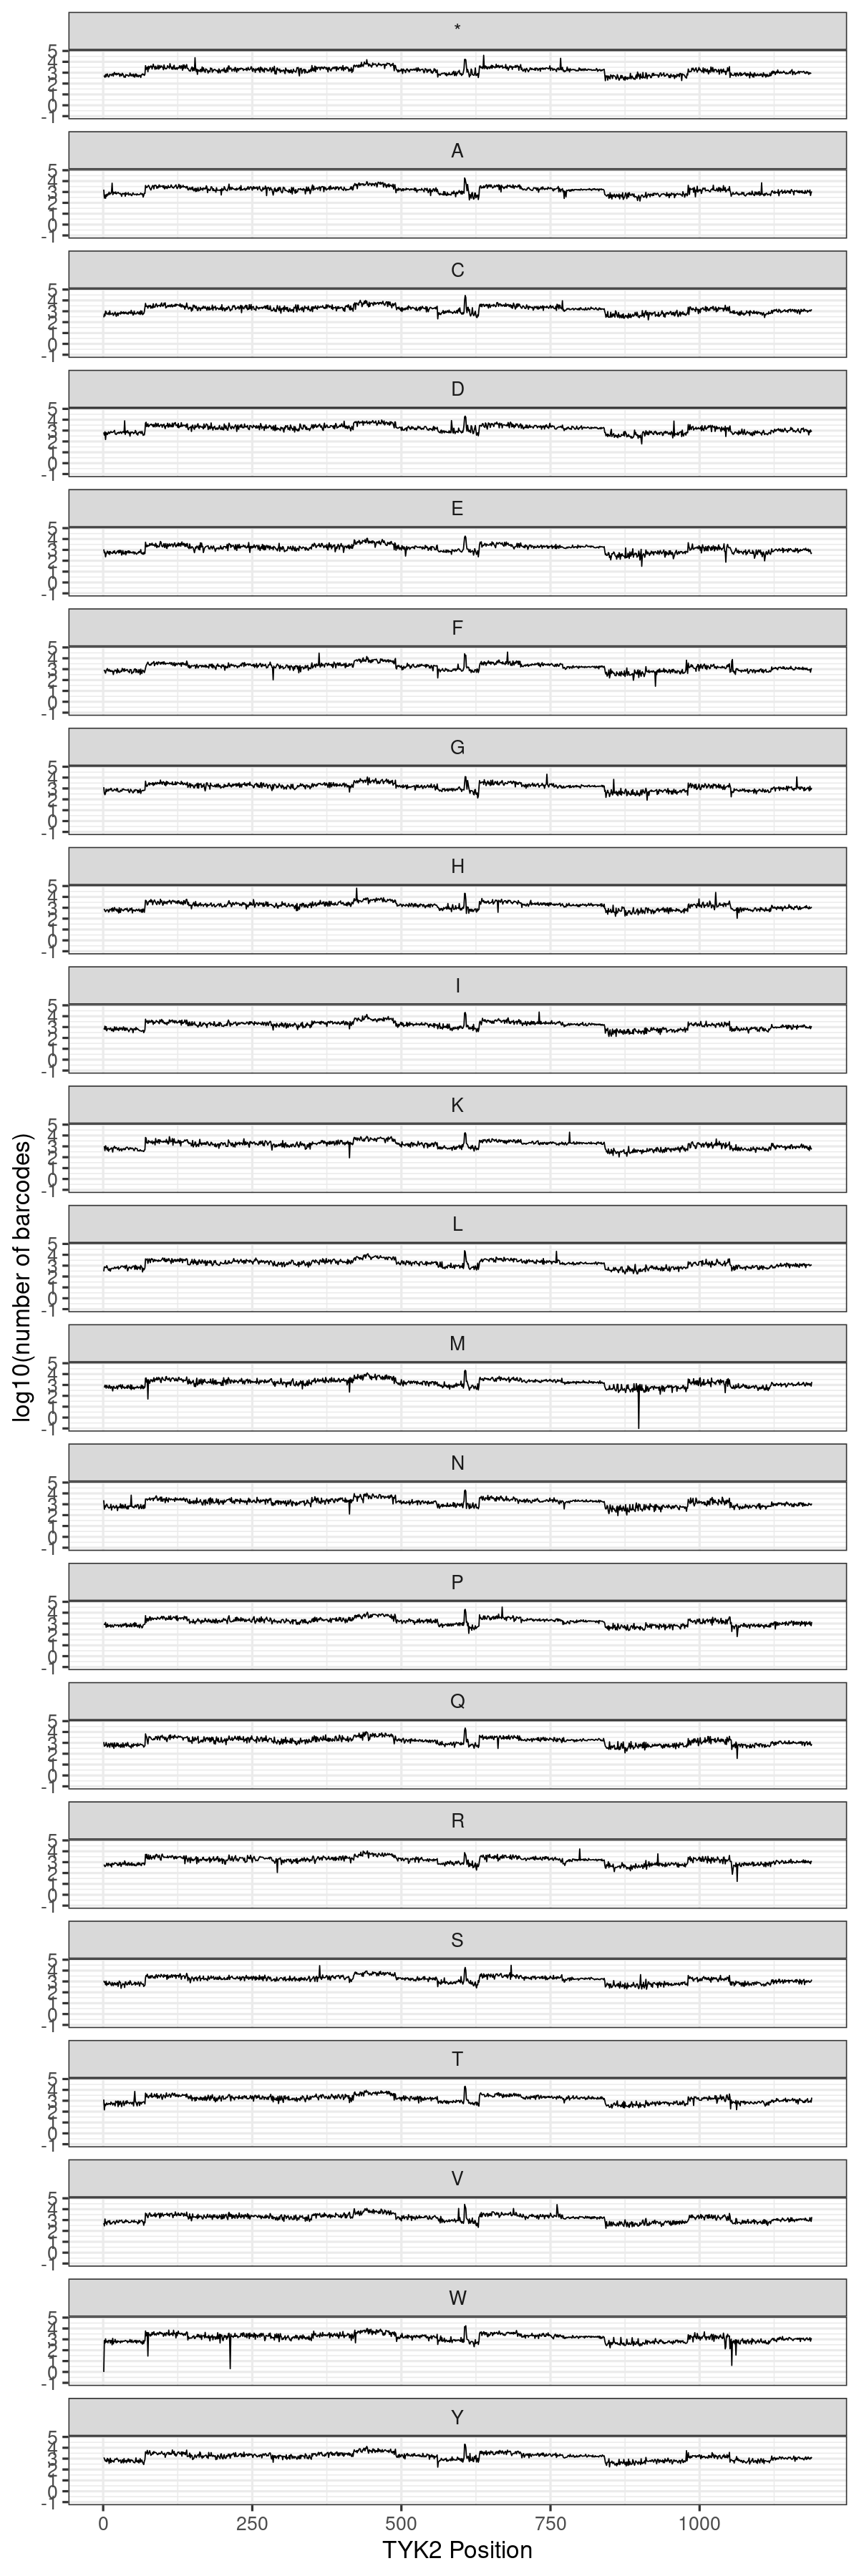

In [123]:
options(repr.plot.width = 10, repr.plot.height = 30)
counts_join %>%
    ggplot() +
        geom_line(aes(x = pos, y = log10(n))) +
        facet_wrap(~mut_aa, ncol = 1) +
        theme_bw(base_size = 20) +
        ylab("log10(number of barcodes)") + xlab("TYK2 Position")

We can show the same plot on a linear scale, which is helpful to see the spike-ins (these are addressed more specifically in the next section):

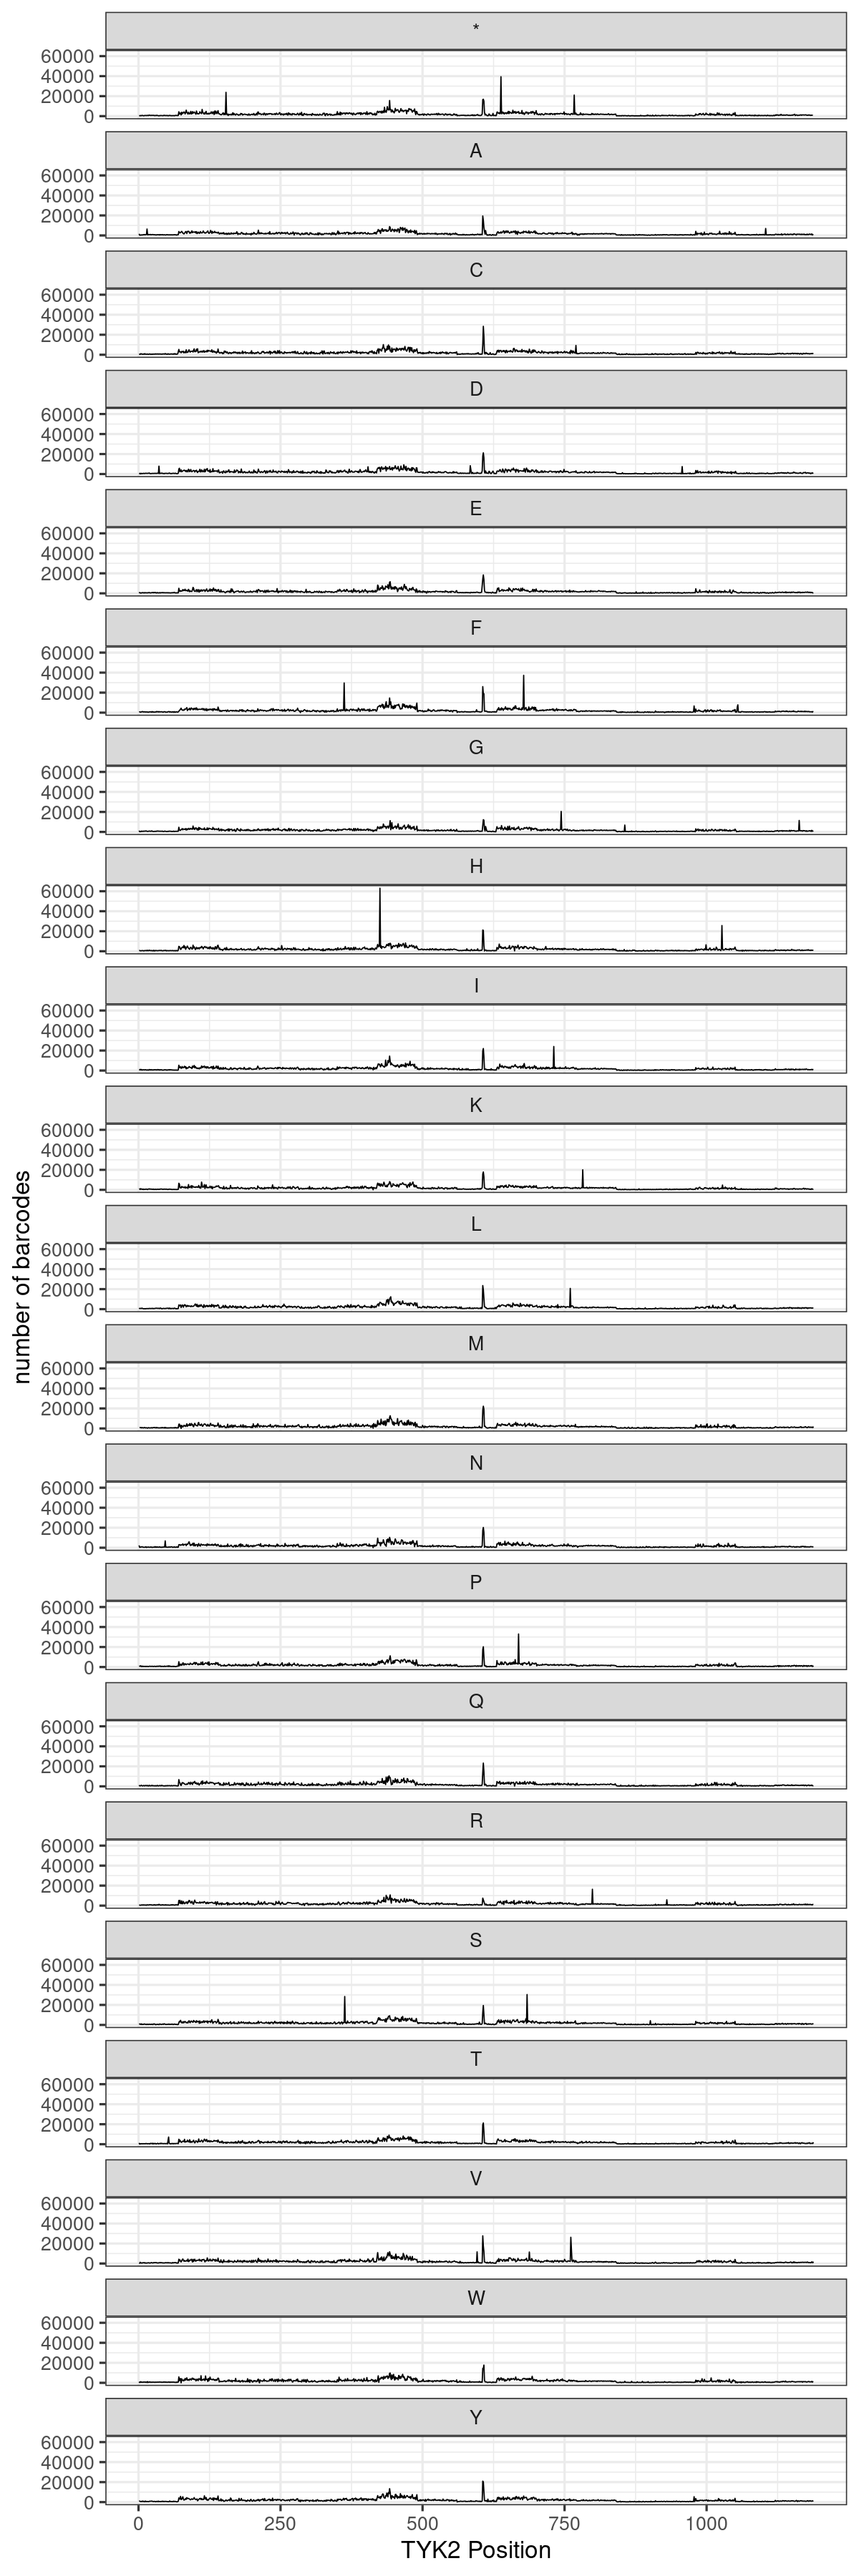

In [124]:
options(repr.plot.width = 10, repr.plot.height = 30)
counts_join %>%
    ggplot() +
        geom_line(aes(x = pos, y = n)) +
        facet_wrap(~mut_aa, ncol = 1) +
        theme_bw(base_size = 20) +
        ylab("number of barcodes") + xlab("TYK2 Position")

#### Spike-Ins

We expect that our spiked-in variants of interest should have many more barcodes than all other non-WT oligos. The easiest way to check is to label each oligo as "spike-in" or "non-spike-in", and then compare the number of unique barcodes attached to each oligo in both groups. There are 32 spiked-in variants, and (at the residue level) the smallest number of unique barcodes attached to any of them is 4233. In all chunks the number of unique barcodes on the spike-ins is consistently 1 log10 away from the median of the rest of the library, which is exactly as expected given the 10X spike.

In [138]:
spikeins <- read_tsv("../design/tyk2-vars.tsv") %>%
    select(wt_residue, position, mut_residue) %>%
    distinct() %>%
    mutate(id = paste0(wt_residue, position, mut_residue)) %>%
    select(id) %>%
    unlist()

Rows: 32 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): wt_residue, mut_residue, ref, alt
dbl (2): position, position_nuc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, see `problems()` for details”


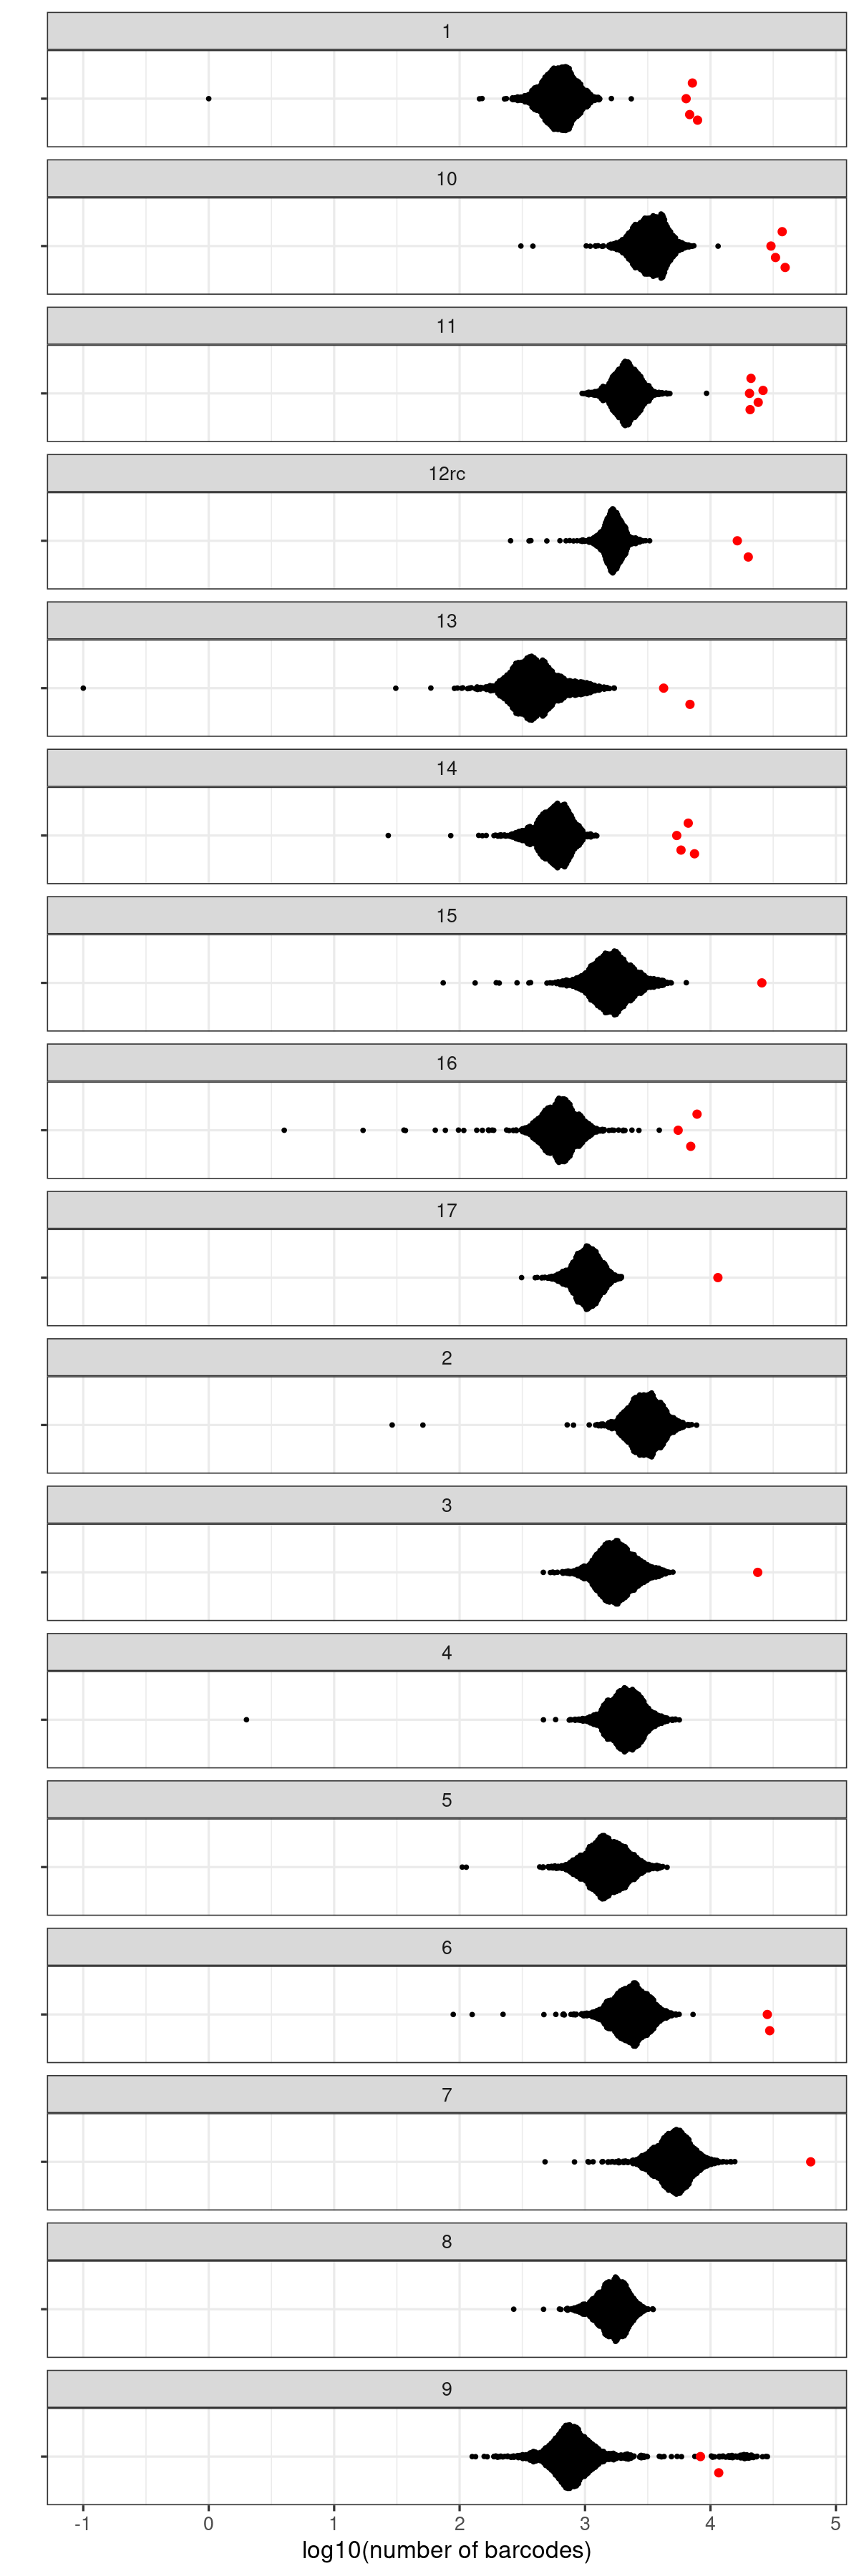

In [156]:
options(repr.plot.width = 10, repr.plot.height = 30, warn = -1)
counts_group <- counts_join %>% 
    mutate(group = if_else(paste0(wt_aa, pos, mut_aa) %in% spikeins, "SpikeIn", "Library"))

ggplot() +
        geom_quasirandom(data = counts_group %>% filter(group == "Library"),
                         aes(x = chunk, y = log10(n))) +
        geom_quasirandom(data = counts_group %>% filter(group == "SpikeIn"),
                      aes(x = chunk, y = log10(n)), color = "red", size = 3) +
        coord_flip() +
        theme_bw(base_size = 20) +
        facet_wrap(~chunk, ncol = 1, scales = "free_y") +
        xlab("") + ylab("log10(number of barcodes)") +
        theme(axis.text.y = element_blank())